# <font color="darkblue"> Exercídio 01: Tendência e Sazonaidade - COVID19 </font>

**Objetivos:**


*   Extrair a tendência e a sazonalidade da série temporal de novos casos do COVID 19 no Brasil
*   Testar o conceito da regressão linear para a obtenção tendência e sazonalidade

**Requisitos de execução:**


*   Upload do arquivo *read_covid.py*
*   Criar o diretório *data* e upload do arquivo *covid.csv* neste diretório

**Atividade 1:**

Leia a série temporal do novo casos de COVID 19 no Brasil contida no arquivo *covid.xls* e plote seus valores em um gráfico de barras.









c:\Users\gabri\OneDrive\Documentos\GitHub\regressao_atvd\read_covid.py:26: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(url, sep=';')


Empty DataFrame
Columns: [regiao, estado, municipio, coduf, codmun, codRegiaoSaude, nomeRegiaoSaude, data, semanaEpi, populacaoTCU2019, casosAcumulado, casosNovos, obitosAcumulado, obitosNovos, Recuperadosnovos, emAcompanhamentoNovos]
Index: []


<BarContainer object of 99 artists>

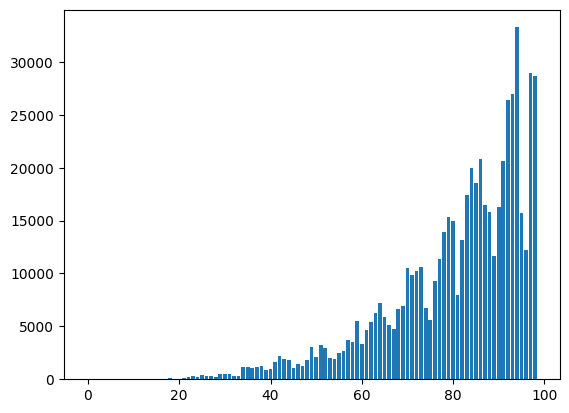

In [4]:
from read_covid import ReadCovid
from matplotlib import pyplot as plt

rd = ReadCovid()
covid = rd.read_csv()

time = covid[ReadCovid.tempo]
data = covid[ReadCovid.casos_novos]

plt.bar(time, data)
    

**Atividade 2:**

Extrai as componenetes tendência e sazonalidade da serie temporal do COVID 19 no Brasil, plotando estas componenetes em gráficos de dispersão sobre o gráfico de barras da série temporal.  Utilize a função *seasonal_decompose* do pacote statsmodels.tsa.seasonal.

**from statsmodels.tsa.seasonal import seasonal_decompose**

Utilize os parâmetros model='additive' e freq=7 na função *seasonal_decompose*.

In [7]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -------------------- ------------------- 5.0/9.6 MB 26.7 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 27.1 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   ------ --------------------------------- 6.3/38.5 MB 31.8 MB/s eta 0:00:02
   -------------- ------------------------- 13.6/38.5 MB 32.8 MB/s eta 0:00:01
   --------------------- ------------------ 21.0/38.5 MB 33.1 MB/s eta 0:00:01
   ---------------------------- ----------- 27.5/38.5 MB 32.6 MB/s eta 0:00:01
   ----------------------------------- ---- 34.6/38.5 MB 32.7 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 30.9 MB/s  0:00:01

   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [scipy]
   ---------------------------------------- 0/3 [


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\gabri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


c:\Users\gabri\OneDrive\Documentos\GitHub\regressao_atvd\read_covid.py:26: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv(url, sep=';')


Empty DataFrame
Columns: [regiao, estado, municipio, coduf, codmun, codRegiaoSaude, nomeRegiaoSaude, data, semanaEpi, populacaoTCU2019, casosAcumulado, casosNovos, obitosAcumulado, obitosNovos, Recuperadosnovos, emAcompanhamentoNovos]
Index: []


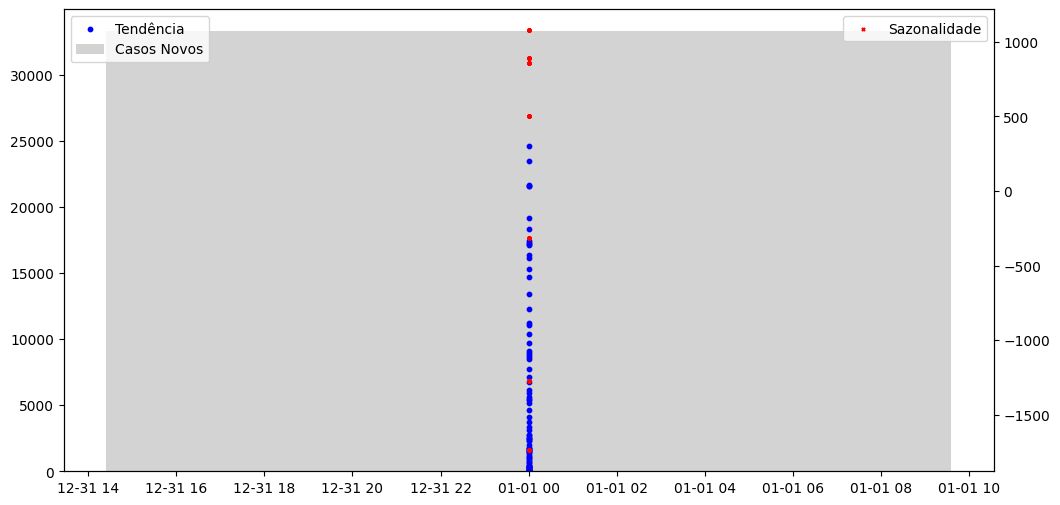

In [11]:
import pandas as pd  # Importante: ter certeza que importou o pandas
from read_covid import ReadCovid
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

rd = ReadCovid()
dados_brutos = rd.read_csv()  # Isso retorna um dicionário (defaultdict)

# --- AQUI ESTÁ A CORREÇÃO ---
# Convertemos o dicionário para DataFrame para poder usar .dropna() e outros recursos
covid = pd.DataFrame(dados_brutos)

# Converter a coluna de data para o tipo datetime (o dicionário traz como texto)
covid[ReadCovid.tempo] = pd.to_datetime(covid[ReadCovid.tempo])

# Agora sim o .dropna() vai funcionar, pois 'covid' virou um DataFrame
covid = covid.dropna(subset=[ReadCovid.casos_novos])

# Definir a data como índice é essencial para séries temporais
covid.set_index(ReadCovid.tempo, inplace=True)

# Selecionar os dados para análise
# Como definimos o índice acima, não precisamos mais da coluna 'time' separada
data = covid[ReadCovid.casos_novos]

# Decomposição
res = seasonal_decompose(data, model='additive', period=7)

# --- PLOTAGEM (Mesmo código anterior) ---
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.bar(data.index, data, color='lightgray', label='Casos Novos')
ax1.scatter(data.index, res.trend, color='blue', s=10, label='Tendência', zorder=5)

ax2 = ax1.twinx()
ax2.scatter(data.index, res.seasonal, color='red', s=5, marker='x', label='Sazonalidade')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()